# Using modules in Python

Modules we will use in this section - you will only need to install these the first time on your computer

In [25]:
#pip install pandas
#pip install scipy

SyntaxError: invalid syntax (759947838.py, line 1)

# Pandas, Numpy & SciPy

These are three libraries that go hand-in-hand (in-hand) together for lots of approaches, particularly big numerical data and statistical methods. With the three of them you can likely achive anything that would be typically associated with R, and means it can be incorporated into the rest of your python code workflow. 

We could spend days on just using these two packages, so lets have a brief overview to form a basis. 

### Pandas

Pandas provides powerful data structures and data analysis tools, making it easier to work with structured and tabular data. Pandas is widely used in bioinformatics for data cleaning, preprocessing, transformation, and analysis.

If you have ever used dataframes in R, that is what Pandas is allowing you to do in Python. It has some syntax styles that I don't find very intuitive, but I don't like R and that is it's style so if you have that experience you'll likely feel at home!

**Main reasons for using Pandas:** dataframe objects and features like remove NAs, time-series, simple filtering etc.

Lets create a simple Pandas dataframe. Here we have some RNAseq expression data and the gene positions. Note when printing how it is structured with row and header characteristics, like some other stats packages we won't name!

In [32]:
import pandas as pd

# Inputted data as dictionary with key to data list
genome_data = {
    "Gene": ["GeneA", "GeneB", "GeneC", "GeneD", "GeneE", "GeneF", "GeneG", "GeneH", "GeneI"],
    "Chromosome": ["Chr1", "Chr2", "Chr3", "Chr2", "Chr1", "Chr1", "Chr3", "Chr2", "Chr1"],
    "Start": [100, 200, 150, 300, 250, 200, 150, 300, 250],
    "End": [500, 400, 600, 450, 350, 400, 600, 450, 350],
    "Strand": ["+", "-", "+", "-", "+", "+", "-", "+", "-"],
    "log2FC" : [2.1, 0.48, -3.6, 4.7, 0.3, 0.5, 1.2, -2.5, 4.1],
    "Function": ["Enzyme", "Transporter", "Receptor", "Structural", "Regulator", "Transporter", "Receptor", "Structural", "Regulator"]
}

# Create DataFrame using the pandas read dictionary function
df = pd.DataFrame(genome_data)

print(type(df))
print(df)

<class 'pandas.core.frame.DataFrame'>
    Gene Chromosome  Start  End Strand  log2FC     Function
0  GeneA       Chr1    100  500      +    2.10       Enzyme
1  GeneB       Chr2    200  400      -    0.48  Transporter
2  GeneC       Chr3    150  600      +   -3.60     Receptor
3  GeneD       Chr2    300  450      -    4.70   Structural
4  GeneE       Chr1    250  350      +    0.30    Regulator
5  GeneF       Chr1    200  400      +    0.50  Transporter
6  GeneG       Chr3    150  600      -    1.20     Receptor
7  GeneH       Chr2    300  450      +   -2.50   Structural
8  GeneI       Chr1    250  350      -    4.10    Regulator


We can filter the data in methods that would be very very dificult to do with standard python. For example to select just specific columns would usually require loops, indexes and appending.

Selecting one column to output, filter or modify works the same as choosing one dictionary element i.e. ```dataset["column_name"]```, but you can select multiple:

In [6]:
# Select specific columns
selected_columns = df[["Gene", "Start", "End"]]
print(selected_columns)

    Gene  Start  End
0  GeneA    100  500
1  GeneB    200  400
2  GeneC    150  600
3  GeneD    300  450
4  GeneE    250  350
5  GeneF    200  400
6  GeneG    150  600
7  GeneH    300  450
8  GeneI    250  350

0     True
1     True
2    False
3     True
4     True
5     True
6     True
7    False
8     True
Name: log2FC, dtype: bool

    Gene Chromosome  Start  End Strand  log2FC     Function
0  GeneA       Chr1    100  500      +    2.10       Enzyme
1  GeneB       Chr2    200  400      -    0.48  Transporter
3  GeneD       Chr2    300  450      -    4.70   Structural
4  GeneE       Chr1    250  350      +    0.30    Regulator
5  GeneF       Chr1    200  400      +    0.50  Transporter
6  GeneG       Chr3    150  600      -    1.20     Receptor
8  GeneI       Chr1    250  350      -    4.10    Regulator


In [ ]:
# Test a column of data (without requiring if)
print(df["log2FC"] > 0)

print()
# Filter rows based on that condition
filtered_rows = df[df["log2FC"] > 0]
print(filtered_rows)

Other functions such as sorting, grouping, and applying functions can be usefully applied

In [7]:
# Sort DataFrame by a column
sorted_df = df.sort_values("Chromosome")
print(sorted_df)

    Gene Chromosome  Start  End Strand  log2FC     Function
0  GeneA       Chr1    100  500      +    2.10       Enzyme
4  GeneE       Chr1    250  350      +    0.30    Regulator
5  GeneF       Chr1    200  400      +    0.50  Transporter
8  GeneI       Chr1    250  350      -    4.10    Regulator
1  GeneB       Chr2    200  400      -    0.48  Transporter
3  GeneD       Chr2    300  450      -    4.70   Structural
7  GeneH       Chr2    300  450      +   -2.50   Structural
2  GeneC       Chr3    150  600      +   -3.60     Receptor
6  GeneG       Chr3    150  600      -    1.20     Receptor

Chromosome
Chr1    1.750000
Chr2    0.893333
Chr3   -1.200000
Name: log2FC, dtype: float64

    Gene Chromosome  Start  End Strand  log2FC     Function  Gene Length
0  GeneA       Chr1    100  500      +    2.10       Enzyme          400
1  GeneB       Chr2    200  400      -    0.48  Transporter          200
2  GeneC       Chr3    150  600      +   -3.60     Receptor          450
3  GeneD       

In [ ]:
# Group DataFrame by a column and calculate summary statistics
print(df.groupby("Chromosome")["log2FC"].mean())

In [ ]:
# Apply a function and create a new column
df["Gene Length"] = df["End"] - df["Start"] 
print(df)

### Exercise

Lets summarise our dataset by function

1. Output the mean and standard deviation of the Log2FC as grouped by function
2. Output the sum of the gene lengths by function

In [19]:
# Your code here


    Gene  Chromosome  Start  End Strand  log2FC     Function  Gene Length  \
0  GeneA           1    100  500      +    2.10       Enzyme          400   
1  GeneB           2    200  400      -    0.48  Transporter          200   
2  GeneC           3    150  600      +   -3.60     Receptor          450   
3  GeneD           2    300  450      -    4.70   Structural          150   
4  GeneE           1    250  350      +    0.30    Regulator          100   
5  GeneF           1    200  400      +    0.50  Transporter          200   
6  GeneG           3    150  600      -    1.20     Receptor          450   
7  GeneH           2    300  450      +   -2.50   Structural          150   
8  GeneI           1    250  350      -    4.10    Regulator          100   

   fix_Start  fix_End  
0        500      100  
1        400      200  
2        600      150  
3        450      300  
4        350      250  
5        400      200  
6        600      150  
7        450      300  
8        350 

We may want to join columns together with ```pd.concat```, combining the mean and standard deviation outputs from the exercise. By default it will use the column headers from the inputs, so we can replace those.

In [ ]:
function_groups = pd.concat([means, stds], axis = 1)
function_groups.columns = ["mean", "st. Deviation"]

### IO with pandas
Pandas also has it's own really simple method to take a pandas dataframe and read/write to/from a csv file:

In [4]:
# Save DataFrame to a CSV file
function_groups.to_csv("genome_data.csv", index=True)

We can also use the pandas `read_csv` function to turn a csv file directly into a pandas object

In [ ]:
# Read in a dataset directly into a pandas object 
new_df = pd.read_csv("/content/genome_data.csv")

print(new_df)

#### Python versus R

At this point, we become very close to the same basic functions that R has, although R certainly has more statistical packages and a huge bias to numerical data.

But when you are in the middle of a long python code, do you really want to change to a different language? 

---

### NumPy & sciPy

Now we've got some data, lets look at what we can do with it.

Numpy (Numerical Python) is a fundamental library for all scientific computing and bioinformatics. It provides powerful data structures, mathematical functions, and tools for efficient numerical operations. 

How much you will find yourself engaging with it will depend on how statistical your analysis is and the level of computation. For example when performing just sequence manipulation it doesn't have much use, but then with large arrays Numpy becomes essential, and we have used it a few times this week for specialised functions. 

**Main reason for using Numpy**: Efficincy with big data, and array methods that are hard to do with loops.

The data we have used so far in this session is quite small and one dimensional so really we're limited to basic statistics and transformations such as mean or normalising. 

Here we have 6 samples with activity data for some rural and urban foxes over 5 days

In [2]:
x_coords = range(1, 121)
sleepRhythms = {'RURAL01': [0.0, 0.1090385461572561, 0.2523607197613669, 0.4740278405989594, 0.3751957533862381, 0.4691408998819496, 0.47958557796687695, 0.3908518814991026, 0.29679485302087955, 0.47603343828470784, 0.15439312405370892, 0.050453770746144336, -0.19931577612990672, -0.1784997710900474, -0.4219483095498466, -0.5765209220531707, -0.3382798537383366, -0.4339083988073161, -0.6705103611691678, -0.5110307560763805, -0.1699303106869748, -0.3138254869583404, 0.027587462533606857, 0.06327569011459706, 0.23245329820193103, 0.6037641277296563, 0.4398955528138698, 0.317118693683734, 0.31459438758071595, 0.23285904794248063, 0.505050182460215, -0.09515735700441756, 0.19442011777022292, -0.03088496281792309, -0.37736757539505883, -0.3978907082741518, -0.4361199199464355, -0.23304307362542476, -0.42532791091063665, -0.5107643047971568, -0.39318093483722205, -0.03906224088258769, 0.0687120462923325, -0.16571895840922382, 0.4480551873284115, 0.15099730157941102, 0.22181099163247525, 0.6344189944569714, 0.4764268775145063, 0.47190909620650656, 0.7499435456627143, 0.3255079141790607, 0.6768376995971567, 0.525991492236753, 0.3716529944714604, -0.2704228752813856, -0.22175516823768904, 0.29810336607539206, -0.012638378372561982, -0.3505209355807203, -0.283064198544694, -0.5352317650937516, -0.6002136123936793, -0.0053101171071433155, 0.4009690850977839, -0.7011887428893292, 0.2601628465266628, -0.30379313261577345, 0.18170439287387727, 0.5729632312110149, 0.45682113103698246, 0.42414259778333474, 0.11823361129375691, 0.32576067905507927, -0.23935598721863552, -0.40466312199215315, -0.43539063607297024, -0.4740009053839253, -0.2710384012222768, -0.31679222587356265, -0.3181046482212407, 0.07021738812358987, 0.024446069417409694, -0.6081305935653012, -0.19356022435234735, 0.368869489448314, 0.46990331079575764, -0.013101009274390833, -0.035159578015324766, 0.2528779139851698, 0.109694322411752, 0.21670520898409715, 0.05813056669992555, -0.2760415095742915, 0.45303374511492367, -0.3000910756665841, 0.31574184557846985, 0.3526795260853009, 0.3671139824634596, 0.13611560152988747, -0.12348833953965582, 0.4587449111697617, -0.19109916148423722, -0.1844070110088259, 0.4910522570734308, -0.43363483630563554, 0.12393309291926576, 0.3771885416211644, 0.09761381630627003, 0.2732734324312621, 0.32108434346834586, 0.493132241613931, 0.3322162522109483, 0.13823166294233252, 0.6975417099744445, 0.12066897957201653, -0.4110533032454298, -0.3788591773093223, 0.24841907612544176, -0.33670970230600816], 
                'RURAL02': [0.0, 0.15644981700623434, 0.24565532571488488, 0.3663406665070315, 0.3760810868149374, 0.397515453433792, 0.6563095097674019, 0.4262714921582301, 0.41713192691984446, 0.28277403722608496, 0.1130579919966964, 0.07487269912666669, -0.046036024385007965, -0.2562525845768131, -0.4313497804888629, -0.4303712328864424, -0.4195880018925656, -0.48967288805945075, -0.5196755686491151, -0.29499665245745216, -0.2544829575249504, -0.1842832856566569, -0.11880949560588003, -0.07651302084613969, 0.2535978377881215, 0.3333537289545992, 0.2836629145073025, 0.2654127672148011, 0.4234049984726081, 0.2859030190168086, 0.08961604889698484, 0.08662234904751996, 0.3432051271723054, -0.19109432842456764, 0.05997484341801427, -0.2956775477595247, -0.30014626010160056, -0.48980663050134615, -0.49907393357711427, -0.41528402670046816, -0.4877883508571823, 0.03230453740235025, -0.15707059257048225, -0.4428019409316702, -0.07681721576962723, 0.42542182105117726, 0.046966448653328316, 0.07330216868111437, 0.636095652832842, 0.5015350780839555, 0.2309327395266988, 0.3277149870866049, 0.22963057091368902, 0.45378079766964474, -0.24706245654305403, 0.6485309323053897, 0.059570047407413666, 0.12194921159309519, -0.5036284649445628, -0.4215392961324453, -0.011799210435893043, -0.3449769333721684, -0.41225676452274684, -0.41990869673233233, -0.44451585849807257, -0.1323909060189263, 0.3882161291490452, 0.647206094017722, 0.1784409389751561, -0.14900466770438556, 0.20889112194743395, -0.011002253447881385, 0.3245983195434147, -0.08569192230584899, 0.46053192538656657, 0.35501858520054974, -0.21830504318494448, -0.2034665733791541, 0.7166251251355561, 0.5349825884713607, 0.19799739210406456, -0.4203947219981741, -0.06402366670016858, -0.2656611725617745, 0.18772765116184623, 0.044658675771708345, -0.3589755197141505, 0.2899608796331518, 0.2718398911028496, 0.4793323438717637, 0.18836442407186607, 0.07392453868895763, 0.08698938137635322, 0.14002989826878318, 0.24316881557908637, 0.3154408423920509, 0.3061254323098129, 0.32448800683645296, 0.2702490062255964, -0.18872714233746213, 0.08897652432320709, 0.5295535700240074, -0.17808493984719928, -0.024706585029639704, 0.26665835549497524, -0.41420438695185147, -0.4253273108823833, 0.34133138214650605, 0.13273542930855134, 0.33382468816454497, 0.23227596102501466, 0.5020630470824237, 0.5551209924679187, 0.32524470932708216, 0.20042574394408336, -0.28468590993612725, 0.24502539595667683, 0.6958278506791918, -0.2647231013916928, 0.4763265134593352], 
                'RURAL03': [0.0, 0.15383059914617625, 0.2934733086953287, 0.3946885021083691, 0.39618175038670944, 0.19846374950622248, 0.4575004375607573, 0.4555975728070369, 0.44929417150584383, 0.2375099067551766, 0.07206912403977724, 0.031187501182787725, -0.08198485530785467, -0.07541814107542445, -0.29092281094838357, -0.5896184710881297, -0.2267612397644383, -0.733287351371946, -0.4034064164157976, -0.46672261661369224, -0.33124615233968174, -0.21811584141880802, -0.13210225144663224, 0.21286385684802486, 0.3517754102070038, 0.24796482897269, 0.2910600693054649, 0.479878632862027, 0.3216603220041893, 0.3545435404454482, 0.06726950511071308, 0.3732836449640373, -0.30822929691948964, -0.05033437600084637, -0.5088057775386978, -0.38044161378676766, -0.2000785201526273, -0.432820159065752, -0.5669312324206454, -0.41048374700346635, -0.4786865117036324, -0.2796288003315628, 0.22916401187743465, -0.39361916049394413, 0.2972051771285902, 0.44160443575366, 0.5267236550667036, 0.11023713789332494, 0.2820883817677821, 0.39833407801650034, 0.6896958304449459, 0.42540853704640513, 0.5823710759586345, 0.5881093971737421, 0.46936581588098625, 0.5060538304770091, 0.36905863839744235, -0.385916584877797, -0.47847834662460953, -0.47751683904468567, -0.5069584045717135, -0.2902970230928122, -0.44046376629194745, -0.40803301361405475, -0.3956378197382253, 0.30051770321133586, -0.1725502040985245, 0.09101400267715436, 0.44872955665539965, 0.40345965362981484, 0.3710719597996034, 0.39943282567323407, 0.33755655761405723, -0.5388621224389603, 0.431249609000512, -0.5251707393944107, 0.2951184176722365, -0.5883045900243673, -0.3919381033059589, 0.3124349824372924, 0.37544811480267914, 0.22513853246516202, -0.3897780989915589, -0.3846526873521312, -0.3087784513818785, -0.4140667857358507, -0.3857084116194467, 0.3364218019463754, 0.2954344784945173, 0.4302155585081965, 0.5746462251602199, 0.3597414450405684, -0.02191467014053538, -0.39627310780818115, -0.35821775820433255, -0.31029528196392514, 0.19033265376348302, 0.37824167644783435, -0.1946090619241875, -0.1510305120902818, -0.43939814369387037, 0.0769338213439037, -0.5575967120515247, 0.008873608844154328, -0.23447187543262762, 0.5914578071267544, -0.33168280588230686, 0.40485072862795685, 0.5308138548324333, -0.3832330537498171, 0.3466301544067387, -0.12801372503022584, -0.32099061353812475, -0.21435146582777026, -0.5816671799147664, -0.33661299069277245, 0.23017445735504105, -0.1539198763062422, -0.4921182040274791, 0.2241722531934818], 
                'URBAN01': [0.0, 0.07615290613914669, 0.1027467500345508, 0.22474826707297083, 0.34764963061818277, 0.38415515851457094, 0.4397508413576989, 0.49021564065966794, 0.47728166145919504, 0.5809172909365489, 0.3684307594293015, 0.40061042684946785, 0.4193734184978121, 0.4876435312843893, 0.18178057886414067, 0.3124808471603635, 0.06716756943473903, -0.044924492844995764, 0.0573802573323723, -0.0015337341991702275, -0.10344449390401765, -0.17781420411745436, -0.3413297642422816, -0.4631212101825603, -0.365331080728431, -0.49611946267958335, -0.4366266939982876, -0.19736352850038263, -0.21506337576198464, -0.2096924228234309, -0.19096223175510213, -0.3763585335643918, -0.4233269978333696, 0.11563337850399005, -0.2365005777744605, -0.3820770925982289, 0.37201489555745815, 0.37784510997079, 0.19019166373864374, 0.2958546476059841, 0.05389442781772211, 0.498482685048762, 0.5702151668914434, 0.28890454021054596, 0.4488436034519282, 0.006028716919033097, 0.06125093852617929, 0.043024774161867715, 0.0012527089725147423, 0.11240244020790643, -0.23714532190987314, 0.5523812775524005, 0.7423822314888519, 0.23562597794964882, -0.5220112241669904, -0.2122152706786756, -0.29006335932587207, -0.32882539985615, -0.2931076268023158, -0.3732792668413086, -0.034572474337075214, -0.3942977567259183, 0.20125229232101996, -0.2174156372624517, -0.09204612104626965, 0.4665144592080322, -0.1534139133366078, 0.2360164562280152, -0.05194000375664746, -0.403199424934152, 0.09122742254146922, -0.44781567058556204, 0.23167763841952727, 0.42578960880057354, -0.16870329298665357, 0.46081175708078137, 0.6298385817437023, 0.06786545964621922, -0.13861443342597782, 0.3720689097939263, 0.6100289195805765, 0.25496517734811974, 0.5980095787175477, 0.3799947272908847, -0.6412495287116613, 0.4581241930507342, 0.08206488818107661, -0.3204503264905592, -0.59574236114695, 0.20519201927628972, -0.32453926490139345, 0.7309837319126847, -0.3216547099315107, 0.342691035081884, -0.5940556377174169, -0.13475199651758837, -0.4678367574538001, -0.47871395903987934, 0.10192261294442034, -0.32547377529453025, 0.15406812438347803, 0.3376322180608162, -0.2960352693951278, 0.4072189208434035, 0.1117276734503541, 0.510925198921012, -0.08040052341775074, -0.3114807031349256, -0.04487769157858612, -0.16003136966686796, -0.17913773826826385, -0.13340314343666673, -0.2905844690607758, -0.37960338483309874, -0.08872284999187369, 0.16964464330701057, 0.10097758109226174, -0.19457017973441715, 0.2948199809883232, 0.5407197161468205], 
                'URBAN02': [0.0, 0.11220957602923227, 0.14381538826674636, 0.16670809081951016, 0.41794350755175114, 0.3663869920612788, 0.35438615530517265, 0.20715575219745005, 0.4937403375814095, 0.5190914789227037, 0.2849550469384347, 0.34985094509565373, 0.40264672178808814, 0.28330126894883834, 0.3405352239031039, 0.3267678910972328, 0.18632339884402044, 0.11247093917846786, 0.14209681966317617, -0.1336030060239746, -0.16211893975357586, -0.13323123381790083, -0.396906596179035, -0.5129494790155648, -0.46567004605937634, -0.35701009470873074, -0.349357224950483, -0.4202946503794422, -0.3665363224861043, -0.13437716352139192, -0.06725921364302631, 0.0569593294671836, -0.4028096670465582, -0.002872202914661485, -0.38615137904985075, -0.3170612359992966, 0.17980770286056566, 0.24889856462718796, 0.45863666953880255, 0.32707426946166024, 0.42226725172980534, 0.12853870901554307, 0.2486268320569629, 0.3246133299587149, 0.33884320223259945, 0.4006943965341073, 0.3512218034730094, 0.18928702190293548, 0.07556941595950985, -0.20907304319885422, 0.2121023508178843, 0.5296501280622619, 0.09314472255737698, -0.594835635003786, -0.19369977819040404, -0.2717717000264996, 0.10976663362718277, 0.006460959122901488, -0.3008227463736536, -0.3650635115297781, -0.26809865511736086, -0.5831514218033995, -0.4478159564569519, -0.2061453181601398, -0.37706201990544047, -0.46172409713555185, 0.24350734375702418, -0.5816908078657868, 0.12596587292492312, -0.19274730267000595, 0.2956834614209701, 0.0482678927441677, 0.1506006960704358, -0.5376663323827678, 0.2961052209061255, 0.235973732123124, 0.45566596203486903, 0.18871530570517964, 0.6832073596537208, 0.4864236937241358, 0.37056193887022365, 0.512617909617116, 0.6978922850705456, 0.46740127027208134, 0.5884428067601803, 0.29901656288608974, 0.020901252146502205, 0.45934586567437513, -0.3805720049250245, -0.2719516794213959, 0.49183829233657633, -0.10624826672249911, -0.17599044606468736, -0.10809493496549082, -0.08373211773197693, -0.2211654948668137, -0.5382596278907765, -0.026898526536018687, 0.2479122933875203, 0.05824009922134203, -0.24582729973824993, -0.4094065459193435, 0.17133296061396688, -0.13196965717726744, 0.5482658046429539, -0.30123873161125875, 0.4319072004389671, 0.08408031885716069, 0.45587698027549417, -0.35526083147503595, 0.5101795890672917, -0.2652008186250282, -0.3791597226298767, 0.29120876547352115, -0.2685776911317756, 0.5495715913380684, 0.14861091168682142, -0.4150135156146501, 0.23137401807698446, -0.44434636504829683], 
                'URBAN03': [0.0, 0.06443721731919809, 0.15447420007387866, 0.2775372031218226, 0.3137504989938954, 0.43504946939156725, 0.4276070897132924, 0.60315252970613, 0.44571209696892156, 0.6119554829704943, 0.45110065870199856, 0.5572651725968145, 0.46291240142589096, 0.20004476664086865, 0.29288490118041194, 0.10887476260099997, 0.07998380935358756, -0.15464178345502946, -0.1535328442792414, -0.13728542499297294, -0.10943088166074377, -0.41223373021892257, -0.4113601100715781, -0.5575140043807599, -0.5774727105863138, -0.30725094511912965, -0.7001695874218542, -0.4192419505120516, -0.5016457105354587, -0.5020962428078618, -0.16233427037398915, -0.10978441879457711, -0.025271677110190204, -0.24796705926563664, 0.34689941016246323, 0.06125303787563878, 0.10928393209930874, -0.14212477306208052, 0.41910181375180133, 0.36659199322835206, 0.23266855487866567, 0.45959812511107034, 0.5350266160587227, 0.4445816502555271, 0.18204212517269155, 0.47404226214529377, 0.11349988557695977, 0.14129125791656724, 0.21283271608719254, 0.551537497495056, -0.4432161414332944, 0.6619183355788554, -0.11997390271173389, 0.23281778123883307, 0.4663277667814032, -0.5487959587100346, -0.4169391369531514, 0.17330102298007413, -0.24711209763641231, -0.17263444225853825, -0.056300534505351815, -0.23528843048154896, 0.1129533361453157, -0.4641349315401511, -0.3034021792875778, 0.3228255777582491, 0.4432289378222374, 0.5274237292633372, -0.41166822701133704, 0.017276239263066717, 0.6019910438143633, 0.47006695633569506, 0.14148825378973134, 0.3054849008710681, 0.04894072020243496, 0.0509231618378913, 0.4046138993436732, 0.31477621667915995, 0.2508028262236799, -0.3262884544017858, 0.3695885633012625, 0.3758005641844639, 0.32015632886421674, 0.22177699071898999, -0.6029976190108861, 0.5045824032367912, -0.30760603779334733, 0.5153129084027146, -0.5854539874750269, -0.1742946684432122, -0.6321393165120291, 0.06687866663668547, -0.5954789175291451, -0.003780970821750222, 0.05562003605894474, 0.2947314443284879, -0.11648789015928326, -0.04064701863620568, -0.5684867414511059, -0.3443144332567788, -0.39149312472145936, 0.5002990639540664, -0.25738503169988763, 0.3928444265229423, 0.1436462147293062, 0.34898779581933165, -0.4266827044154092, 0.23749724548454101, -0.15313774426386673, 0.4033133582119277, 0.09077058536180066, 0.6124954341592508, -0.20665044955260412, 0.3991500176272199, -0.1935828897010067, -0.2183157129127996, -0.18094626421497365, 0.5604916007408097, -0.45990418389154347, 0.21604535607248626]}

Lets visualise the data first

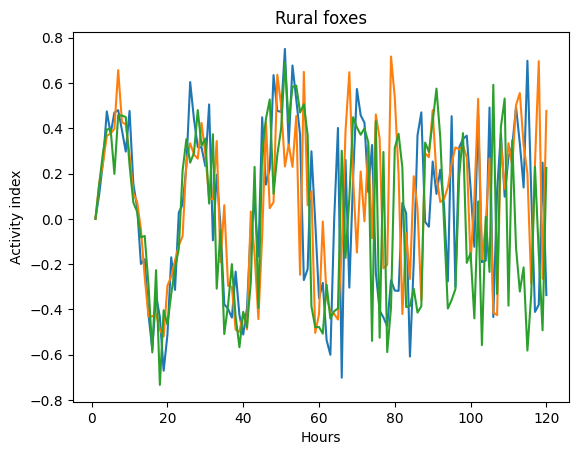

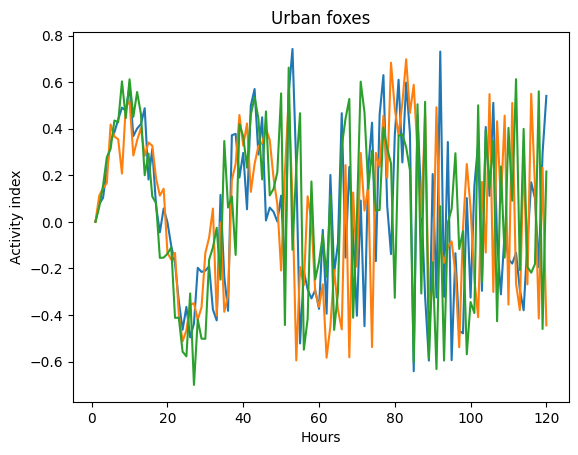

In [3]:
import matplotlib.pyplot as plt

# WT
for sample in sleepRhythms.keys():
  if sample.startswith("RURAL"):
    plt.plot(x_coords,sleepRhythms.get(sample))
plt.title("Rural foxes")
plt.xlabel("Hours")
plt.ylabel("Activity index")
plt.show()

# KO
for sample in sleepRhythms.keys():
  if sample.startswith("URBAN"):
    plt.plot(x_coords,sleepRhythms.get(sample))
plt.title("Urban foxes")
plt.xlabel("Hours")
plt.ylabel("Activity index")
plt.show()


Lets first calculate some basic statistics within our data. Functions like correlations and variance are baked in ready which can be useful.

In [4]:
import numpy as np
import pandas as pd

all_calcs = {}
for sample in sleepRhythms.keys():
    # Requires converting the data into a numpy array format
    y = np.array([sleepRhythms.get(sample)])

    all_calcs[sample] = [np.mean(y), np.std(y), np.max(y)]

# Outputting with pandas
# Note the .T to transpose the data
df = pd.DataFrame(all_calcs).T
df.columns = ['Mean', 'Std Deviation', 'Max']

print(df)

             Mean  Std Deviation       Max
RURAL01  0.048680       0.360210  0.749944
RURAL02  0.070937       0.330777  0.716625
RURAL03  0.000637       0.376962  0.689696
URBAN01  0.038133       0.341598  0.742382
URBAN02  0.045256       0.338333  0.697892
URBAN03  0.053977       0.361117  0.661918


Above we are manipulating individual samples, but we can use numpy to apply functions accross arrays. Let's merge our arrays and have the mean for the 3 replicates to have two datasets, and plot them again. (is this statistcally a good idea? Probably not, but lets do it anyway!)

In [5]:
AllRural = [sleepRhythms["RURAL01"], sleepRhythms["RURAL02"], sleepRhythms["RURAL03"]]
AllUrban = [sleepRhythms["URBAN02"], sleepRhythms["URBAN02"], sleepRhythms["URBAN03"]]

# Rural averaging
RuralMean = np.mean(AllRural, axis=0)

# Urban averaging
UrbanMean = np.mean(AllUrban, axis=0)

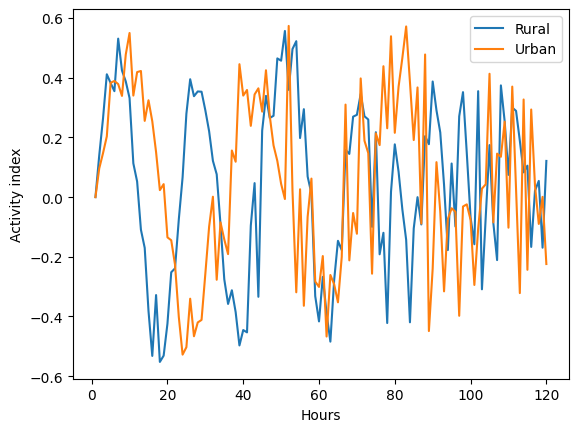

In [22]:
plt.plot(x_coords,RuralMean, label="Rural")
plt.plot(x_coords,UrbanMean, label="Urban")
plt.xlabel("Hours")
plt.ylabel("Activity index")
plt.legend()
plt.show()

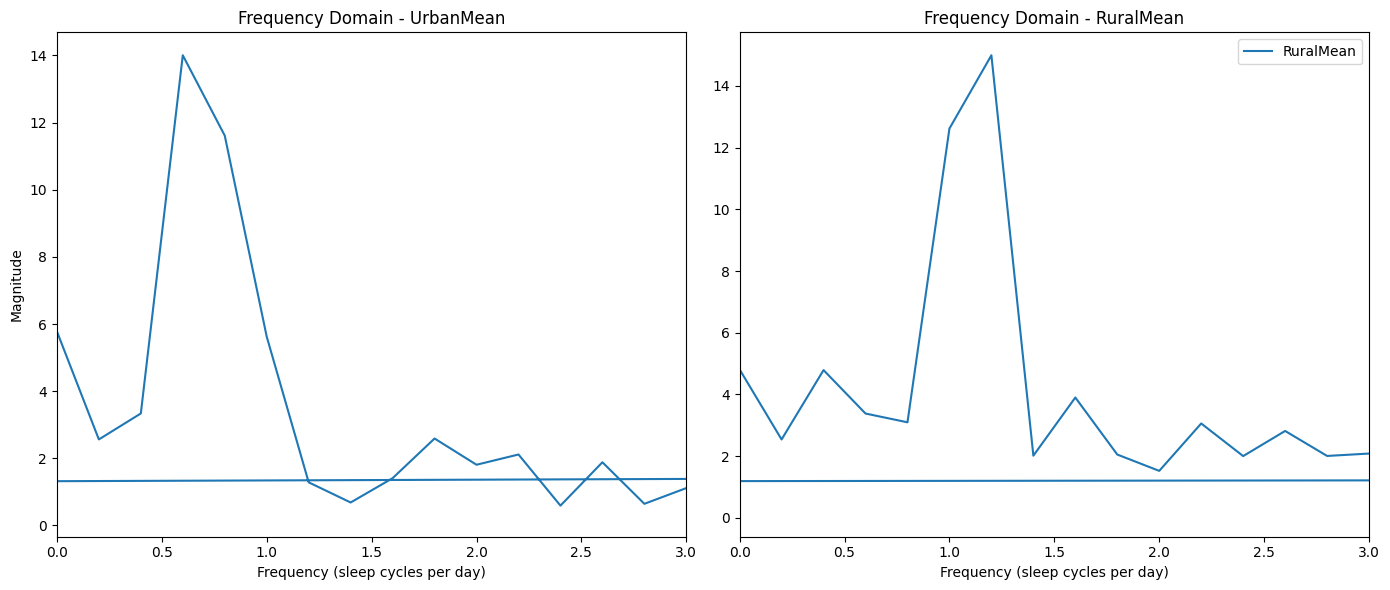

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Perform FFT on both data series
fft_UrbanMean = np.fft.fft(UrbanMean)
fft_RuralMean = np.fft.fft(RuralMean)

# Compute the frequency bins with correct sampling interval
freq = np.fft.fftfreq(len(UrbanMean), d=1/24)  # d=1 for 1 hour between samples

# Calculate the magnitudes of the FFTs
mag_UrbanMean = np.abs(fft_UrbanMean)
mag_RuralMean = np.abs(fft_RuralMean)

# Plotting
plt.figure(figsize=(14, 6))

# Plot for Data1
plt.subplot(1, 2, 1)
plt.plot(freq, mag_UrbanMean, label='UrbanMean')
plt.title('Frequency Domain - UrbanMean')
plt.xlabel('Frequency (sleep cycles per day)')
plt.ylabel('Magnitude')
plt.xlim(0, 3)  

# Plot for Data2
plt.subplot(1, 2, 2)
plt.plot(freq, mag_RuralMean, label='RuralMean')
plt.title('Frequency Domain - RuralMean')
plt.xlabel('Frequency (sleep cycles per day)')
plt.xlim(0, 3)  
plt.legend()

plt.tight_layout()
plt.show()

Using numpy allows us to achive in just a few lines of code what would take 10s of lines if in basic python.

### SciPy

Finally lets do some proper statistical testing using sciPy. NumPy is good for working with arrays, but SciPy builds on this to provide a large number of higher-level processes like more advanced statistics, curve fitting, root finding etc.

For now lets just focus on the stats module. Firstly, lets see what functions are found within it:

In [35]:
import scipy.stats

dir(scipy.stats)

['BootstrapMethod',
 'CensoredData',
 'ConstantInputWarning',
 'Covariance',
 'DegenerateDataWarning',
 'FitError',
 'MonteCarloMethod',
 'NearConstantInputWarning',
 'PermutationMethod',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_axis_nan_policy',
 '_biasedurn',
 '_binned_statistic',
 '_binomtest',
 '_boost',
 '_censored_data',
 '_common',
 '_constants',
 '_continuous_distns',
 '_covariance',
 '_crosstab',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_entropy',
 '_fit',
 '_hypotests',
 '_kde',
 '_ksstats',
 '_levy_stable',
 '_mannwhitneyu',
 '_morestats',
 '_mstats_basic',
 '_mstats_extras',
 '_multicomp',
 '_multivariate',
 '_mvn',
 '_odds_ratio',
 '_page_trend_test',
 '_qmc',
 '_qmc_cy',
 '_qmvnt',
 '_rcont',
 '_relative_risk',
 '_resampling',
 '_rvs_sampling',
 '_sensitivity_analysis',
 '_sobol',
 '_statlib',
 '_stats',
 '_stats_mstats_common',
 '_stats_py',
 '_s

Lets do two correlation tests to try out the module. Although this mock-data is not a good proof of the tests being accurate, you can see how easy to apply the analysis.

In [36]:
from scipy.stats import spearmanr, pearsonr

# Perform spearmans Rho test
stat, pvalue = spearmanr(UrbanMean, RuralMean)
print("Spearman Rank test")
print("R2= {} (p={})".format(round(stat,3), round(pvalue, 5)))
print()

# Perform Pearsons correlation test
stat, pvalue = pearsonr(UrbanMean, RuralMean)
print("Pearsons correlation co-efficient")
print("R2= {} (p={})".format(round(stat,3), round(pvalue, 5)))

Spearman Rank test
R2= 0.025 (p=0.78994)

Pearsons correlation co-efficient
R2= 0.014 (p=0.88216)


#### Exercise: 

We were looking at some nice Transcription Factor Binding site abundances yesterday with nice normal distributions. Or were they normal??

Perform a shapiro test for normality on each sample in our ChIPSeq data from the Day3 Project. 

Below demonstrates the method for one sample.
- Run the tests for each of the 6 samples, printing the Pvalue 
- **Extension:** Create a function which can be called with just the name of the sample to perform the test
- **Extension:** Output not just the p-value but whether a sample passes the test (i.e. at significance p<0.05)

First lets remind ourselves of the data:

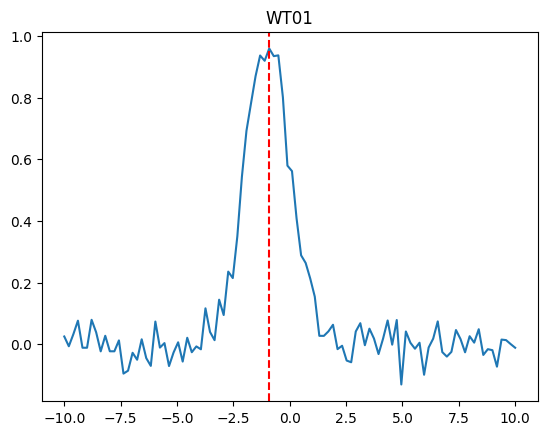

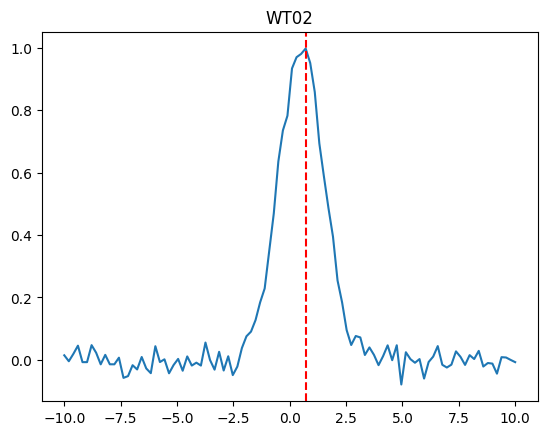

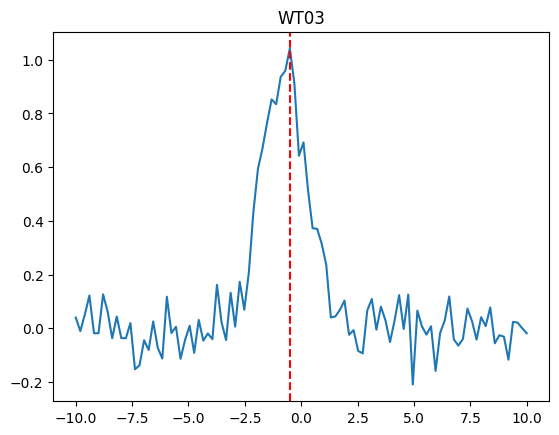

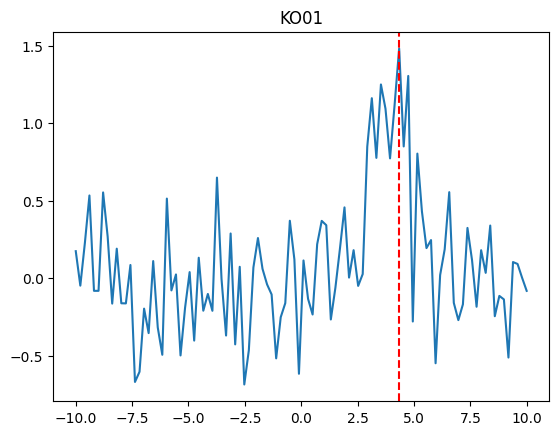

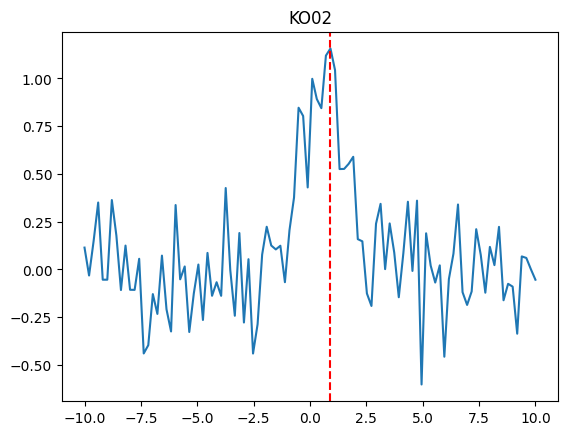

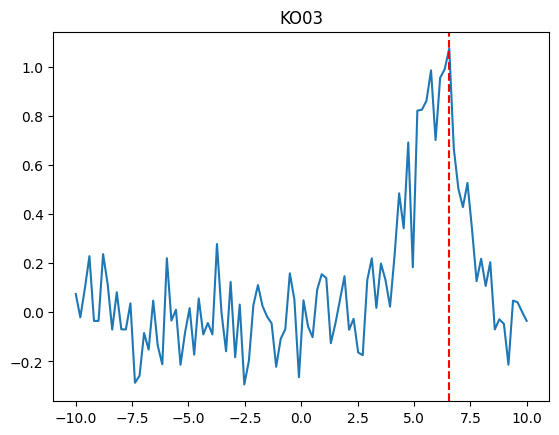

In [20]:
TFBSs = {'WT01': [[-10.0, -9.797979797979798, -9.595959595959595, -9.393939393939394, -9.191919191919192, -8.98989898989899, -8.787878787878787, -8.585858585858587, -8.383838383838384, -8.181818181818182, -7.979797979797979, -7.777777777777778, -7.575757575757576, -7.373737373737374, -7.171717171717171, -6.96969696969697, -6.767676767676768, -6.565656565656566, -6.363636363636363, -6.161616161616162, -5.959595959595959, -5.757575757575758, -5.555555555555555, -5.353535353535354, -5.151515151515151, -4.94949494949495, -4.747474747474747, -4.545454545454546, -4.343434343434343, -4.141414141414142, -3.9393939393939394, -3.737373737373738, -3.5353535353535355, -3.333333333333333, -3.1313131313131315, -2.929292929292929, -2.7272727272727275, -2.525252525252525, -2.3232323232323235, -2.121212121212121, -1.9191919191919187, -1.717171717171718, -1.5151515151515156, -1.3131313131313131, -1.1111111111111107, -0.9090909090909101, -0.7070707070707076, -0.5050505050505052, -0.30303030303030276, -0.10101010101010033, 0.10101010101010033, 0.30303030303030276, 0.5050505050505052, 0.7070707070707076, 0.9090909090909083, 1.1111111111111107, 1.3131313131313131, 1.5151515151515156, 1.7171717171717162, 1.9191919191919187, 2.121212121212121, 2.3232323232323235, 2.525252525252524, 2.7272727272727266, 2.929292929292929, 3.1313131313131315, 3.333333333333334, 3.5353535353535346, 3.737373737373737, 3.9393939393939394, 4.141414141414142, 4.3434343434343425, 4.545454545454545, 4.747474747474747, 4.94949494949495, 5.1515151515151505, 5.353535353535353, 5.555555555555555, 5.757575757575758, 5.9595959595959584, 6.161616161616163, 6.363636363636363, 6.565656565656564, 6.767676767676768, 6.969696969696969, 7.171717171717173, 7.373737373737374, 7.575757575757574, 7.777777777777779, 7.979797979797979, 8.18181818181818, 8.383838383838384, 8.585858585858585, 8.787878787878789, 8.98989898989899, 9.19191919191919, 9.393939393939394, 9.595959595959595, 9.7979797979798, 10.0], [0.024835707650561638, -0.006913215058559218, 0.032384426905034715, 0.07615149282040178, -0.01170766873616412, -0.011706847847445299, 0.07896064077543714, 0.038371736457964746, -0.023473719295299168, 0.027128002185605894, -0.023170884614253002, -0.023286487572677417, 0.012098113986081483, -0.09566401072456185, -0.08624588626964101, -0.02811435820365532, -0.050641496263793495, 0.015712554358744923, -0.04540063756420216, -0.07061354560194667, 0.07328699567395373, -0.01127665386740717, 0.0034075650039152067, -0.07116078797889451, -0.02703823131675952, 0.005956169757762421, -0.05665744608770373, 0.020648726819942, -0.02629420375112613, -0.007388769818949274, -0.01678569132543404, 0.11621157477979752, 0.03952029530634777, 0.012842982168735508, 0.14431058985850037, 0.09446154081516586, 0.2354250318893722, 0.2145018619332807, 0.35025605036152235, 0.5432032486272783, 0.6923578370875558, 0.7818069943713853, 0.8699536397806791, 0.9371015602232684, 0.9199200738080698, 0.9598840840957631, 0.9349716210831763, 0.9375730740190088, 0.8015438959178701, 0.5794310807705013, 0.5616719344331439, 0.4086124127792228, 0.28835206243915956, 0.26350731584845694, 0.21320122491206775, 0.15426515114584213, 0.026926093674337424, 0.026838307682823276, 0.04149746765721217, 0.0628876907050029, -0.016292882388164693, -0.005284850857738507, -0.0533149370502325, -0.05884812424060217, 0.041070297572602533, 0.06800869291910734, -0.0035168577317869648, 0.0502107959917431, 0.01809518653236153, -0.03225095126592809, 0.018071599555516713, 0.07690245920637434, -0.0017910919291937704, 0.07823224991410932, -0.130987234610055, 0.04109513128474359, 0.004352355127160706, -0.014950367057674796, 0.004588038948116272, -0.09937844569968746, -0.010983594384584544, 0.017855628577268426, 0.07389470223744793, -0.025913510913603298, -0.04042468014464325, -0.025087852179223668, 0.04577010588510431, 0.016437555482984333, -0.026488010188351924, 0.02566337165566781, 0.00485387746740202, 0.04843224952664446, -0.03510265469386762, -0.016383107329888413, -0.019605407656607884, -0.07317574740660593, 0.014806013853228803, 0.013052763608994468, 0.0002556728321230445, -0.011729356668757346]], 
 'WT02': [[-10.0, -9.797979797979798, -9.595959595959595, -9.393939393939394, -9.191919191919192, -8.98989898989899, -8.787878787878787, -8.585858585858587, -8.383838383838384, -8.181818181818182, -7.979797979797979, -7.777777777777778, -7.575757575757576, -7.373737373737374, -7.171717171717171, -6.96969696969697, -6.767676767676768, -6.565656565656566, -6.363636363636363, -6.161616161616162, -5.959595959595959, -5.757575757575758, -5.555555555555555, -5.353535353535354, -5.151515151515151, -4.94949494949495, -4.747474747474747, -4.545454545454546, -4.343434343434343, -4.141414141414142, -3.9393939393939394, -3.737373737373738, -3.5353535353535355, -3.333333333333333, -3.1313131313131315, -2.929292929292929, -2.7272727272727275, -2.525252525252525, -2.3232323232323235, -2.121212121212121, -1.9191919191919187, -1.717171717171718, -1.5151515151515156, -1.3131313131313131, -1.1111111111111107, -0.9090909090909101, -0.7070707070707076, -0.5050505050505052, -0.30303030303030276, -0.10101010101010033, 0.10101010101010033, 0.30303030303030276, 0.5050505050505052, 0.7070707070707076, 0.9090909090909083, 1.1111111111111107, 1.3131313131313131, 1.5151515151515156, 1.7171717171717162, 1.9191919191919187, 2.121212121212121, 2.3232323232323235, 2.525252525252524, 2.7272727272727266, 2.929292929292929, 3.1313131313131315, 3.333333333333334, 3.5353535353535346, 3.737373737373737, 3.9393939393939394, 4.141414141414142, 4.3434343434343425, 4.545454545454545, 4.747474747474747, 4.94949494949495, 5.1515151515151505, 5.353535353535353, 5.555555555555555, 5.757575757575758, 5.9595959595959584, 6.161616161616163, 6.363636363636363, 6.565656565656564, 6.767676767676768, 6.969696969696969, 7.171717171717173, 7.373737373737374, 7.575757575757574, 7.777777777777779, 7.979797979797979, 8.18181818181818, 8.383838383838384, 8.585858585858585, 8.787878787878789, 8.98989898989899, 9.19191919191919, 9.393939393939394, 9.595959595959595, 9.7979797979798, 10.0], [0.014901424590336979, -0.004147929035135539, 0.019430656143020773, 0.04569089569224076, -0.007024601241700079, -0.007024108708475416, 0.047376384465221744, 0.02302304187458726, -0.014084231578048556, 0.01627680130757898, -0.013902530784373625, -0.013971892607106386, 0.007258868146987911, -0.057398407339699434, -0.05174753497522512, -0.016868625876463633, -0.03038493360664058, 0.009427419992287644, -0.027240722206711115, -0.042369110809049856, 0.0439694639370708, -0.006773285873290009, 0.0020258570365673744, -0.042742409304185325, -0.01633136575154294, 0.0033280336334520384, -0.03452875866079554, 0.011273906522279675, -0.018011107393593326, -0.008729820356738084, -0.017998667481826183, 0.055694542318820046, -0.00011387360891567717, -0.0310869480481084, 0.026045973418275893, -0.03383059408572369, 0.011740460972493743, -0.04849489248420628, -0.02125909275327216, 0.03811911697619894, 0.07575193062176126, 0.09075344285372233, 0.12781121025255568, 0.1842261677099998, 0.22876557309075582, 0.34895404216232073, 0.468808480921967, 0.6351810663517446, 0.7346960305695039, 0.7818725098936687, 0.9332114460090799, 0.9692359415796828, 0.9796795862715181, 0.9971393345354964, 0.9506576351447806, 0.8576074515701989, 0.6933222580747777, 0.588065130502523, 0.4866924511398444, 0.3945603240138099, 0.2543235347994995, 0.18417260488940634, 0.09543883393805441, 0.04782588848552325, 0.07667717840984772, 0.0720571650724165, 0.01590270977237124, 0.040090844849451926, 0.016147777645390965, -0.016654164516416003, 0.012162099274896452, 0.046760971335058306, -0.0007953770181783749, 0.04706021281001754, -0.07854212837409431, 0.024677104786861834, 0.002619080446035456, -0.008967402056981016, 0.002753817770521991, -0.059626730576543864, -0.0065900470921374105, 0.01071341134277006, 0.04433683159115233, -0.015548103599463983, -0.02425480727233045, -0.01505271109157115, 0.027462063586037765, 0.009862533303225335, -0.015892806109859294, 0.015398022994110555, 0.0029123264805946975, 0.029059349716018534, -0.02106159281631422, -0.009829864397931832, -0.011763244593964505, -0.04390544844396351, 0.008883608311937288, 0.00783165816539668, 0.00015340369927382684, -0.007037614001254407]], 
 'WT03': [[-10.0, -9.797979797979798, -9.595959595959595, -9.393939393939394, -9.191919191919192, -8.98989898989899, -8.787878787878787, -8.585858585858587, -8.383838383838384, -8.181818181818182, -7.979797979797979, -7.777777777777778, -7.575757575757576, -7.373737373737374, -7.171717171717171, -6.96969696969697, -6.767676767676768, -6.565656565656566, -6.363636363636363, -6.161616161616162, -5.959595959595959, -5.757575757575758, -5.555555555555555, -5.353535353535354, -5.151515151515151, -4.94949494949495, -4.747474747474747, -4.545454545454546, -4.343434343434343, -4.141414141414142, -3.9393939393939394, -3.737373737373738, -3.5353535353535355, -3.333333333333333, -3.1313131313131315, -2.929292929292929, -2.7272727272727275, -2.525252525252525, -2.3232323232323235, -2.121212121212121, -1.9191919191919187, -1.717171717171718, -1.5151515151515156, -1.3131313131313131, -1.1111111111111107, -0.9090909090909101, -0.7070707070707076, -0.5050505050505052, -0.30303030303030276, -0.10101010101010033, 0.10101010101010033, 0.30303030303030276, 0.5050505050505052, 0.7070707070707076, 0.9090909090909083, 1.1111111111111107, 1.3131313131313131, 1.5151515151515156, 1.7171717171717162, 1.9191919191919187, 2.121212121212121, 2.3232323232323235, 2.525252525252524, 2.7272727272727266, 2.929292929292929, 3.1313131313131315, 3.333333333333334, 3.5353535353535346, 3.737373737373737, 3.9393939393939394, 4.141414141414142, 4.3434343434343425, 4.545454545454545, 4.747474747474747, 4.94949494949495, 5.1515151515151505, 5.353535353535353, 5.555555555555555, 5.757575757575758, 5.9595959595959584, 6.161616161616163, 6.363636363636363, 6.565656565656564, 6.767676767676768, 6.969696969696969, 7.171717171717173, 7.373737373737374, 7.575757575757574, 7.777777777777779, 7.979797979797979, 8.18181818181818, 8.383838383838384, 8.585858585858585, 8.787878787878789, 8.98989898989899, 9.19191919191919, 9.393939393939394, 9.595959595959595, 9.7979797979798, 10.0], [0.039737132240898615, -0.01106114409369477, 0.05181508304805541, 0.12184238851264213, -0.018732269977866367, -0.01873095655593172, 0.12633702524060528, 0.06139477833230135, -0.03755795087447194, 0.04340480348834738, -0.03707341541859715, -0.037258380258876025, 0.01935698183257705, -0.15306241915939167, -0.13799342507317053, -0.04498299691608085, -0.08102647114686906, 0.025139847060731742, -0.07264173619041409, -0.1129837237275112, 0.11725355816013569, -0.018057500930304223, 0.00541453495449516, -0.11394841214650785, -0.04347331992962722, 0.009056235325539558, -0.09166616205823129, 0.03095485283779183, -0.04617387548105694, -0.01957244528729657, -0.04089481347989692, 0.16156107720897245, 0.022648696868103915, -0.044215395442308784, 0.1318425496642724, 0.005960873398863781, 0.17281976033741417, 0.06899421347121576, 0.20719419642475762, 0.4335287176285464, 0.593645892461611, 0.6703608726927143, 0.7651062421145435, 0.852557831153455, 0.8344755555365936, 0.9364797187514263, 0.9588402804236036, 1.042004627841168, 0.9113204377452219, 0.6422145493857878, 0.6922971214311878, 0.5134481276168771, 0.37258706791129026, 0.3701534524100319, 0.3146011065930695, 0.23553108207527645, 0.04010517111227663, 0.04382868252193331, 0.06858553454222055, 0.10284136039381589, -0.024306502687348047, -0.007235088827513868, -0.08453545978145696, -0.09370892803434677, 0.06595705274751527, 0.10893969728353946, -0.005565753406745411, 0.08036555093020434, 0.02896472155735991, -0.05159632260761176, 0.028916634888009073, 0.12304472579518778, -0.002865459020635185, 0.12517170015121942, -0.20957954197877268, 0.06575222069836202, 0.00696377145010654, -0.02392058634389601, 0.007340862582332036, -0.15900551304837576, -0.017573750997067664, 0.028569005728126023, 0.11823152358097756, -0.041461617461525324, -0.06467948823137717, -0.04014056348674705, 0.07323216941616904, 0.02630008877277534, -0.042380816301363, 0.04106139464906851, 0.007766203947843234, 0.07749159924263115, -0.05616424751018819, -0.026212971727821457, -0.03136865225057261, -0.11708119585056949, 0.023689622165166086, 0.020884421774391145, 0.0004090765313968712, -0.018766970670011755]], 
 'KO01': [[-10.0, -9.797979797979798, -9.595959595959595, -9.393939393939394, -9.191919191919192, -8.98989898989899, -8.787878787878787, -8.585858585858587, -8.383838383838384, -8.181818181818182, -7.979797979797979, -7.777777777777778, -7.575757575757576, -7.373737373737374, -7.171717171717171, -6.96969696969697, -6.767676767676768, -6.565656565656566, -6.363636363636363, -6.161616161616162, -5.959595959595959, -5.757575757575758, -5.555555555555555, -5.353535353535354, -5.151515151515151, -4.94949494949495, -4.747474747474747, -4.545454545454546, -4.343434343434343, -4.141414141414142, -3.9393939393939394, -3.737373737373738, -3.5353535353535355, -3.333333333333333, -3.1313131313131315, -2.929292929292929, -2.7272727272727275, -2.525252525252525, -2.3232323232323235, -2.121212121212121, -1.9191919191919187, -1.717171717171718, -1.5151515151515156, -1.3131313131313131, -1.1111111111111107, -0.9090909090909101, -0.7070707070707076, -0.5050505050505052, -0.30303030303030276, -0.10101010101010033, 0.10101010101010033, 0.30303030303030276, 0.5050505050505052, 0.7070707070707076, 0.9090909090909083, 1.1111111111111107, 1.3131313131313131, 1.5151515151515156, 1.7171717171717162, 1.9191919191919187, 2.121212121212121, 2.3232323232323235, 2.525252525252524, 2.7272727272727266, 2.929292929292929, 3.1313131313131315, 3.333333333333334, 3.5353535353535346, 3.737373737373737, 3.9393939393939394, 4.141414141414142, 4.3434343434343425, 4.545454545454545, 4.747474747474747, 4.94949494949495, 5.1515151515151505, 5.353535353535353, 5.555555555555555, 5.757575757575758, 5.9595959595959584, 6.161616161616163, 6.363636363636363, 6.565656565656564, 6.767676767676768, 6.969696969696969, 7.171717171717173, 7.373737373737374, 7.575757575757574, 7.777777777777779, 7.979797979797979, 8.18181818181818, 8.383838383838384, 8.585858585858585, 8.787878787878789, 8.98989898989899, 9.19191919191919, 9.393939393939394, 9.595959595959595, 9.7979797979798, 10.0], [0.17384995355393143, -0.048392505409914625, 0.22669098833524234, 0.5330604497428089, -0.08195368115316759, -0.08194793493221318, 0.552724485427587, 0.26860215520351804, -0.16431603507723322, 0.18989601525508762, -0.1621961924843618, -0.1630054137495899, 0.08468679504811194, -0.6696480856302293, -0.6037212413795614, -0.19680063523434044, -0.3544908921170483, 0.10998656640834585, -0.3178084264324238, -0.494306295467352, 0.5129770691225439, -0.07902170517028748, 0.023634871640773342, -0.49866186517470984, -0.19053395358381392, 0.038822906398453136, -0.40284775209780593, 0.1314943064209853, -0.21022354147158095, -0.10209281242764283, -0.21059731428026837, 0.6482973645782282, -0.004724028657809091, -0.37019882513246466, 0.2878907192451702, -0.4272952774523904, 0.07310225840051184, -0.6858845427902397, -0.46486511503598005, 0.06890143985983518, 0.25846332765017954, 0.05997897827365577, -0.04047665049117948, -0.10538555202409516, -0.5174805716065833, -0.25193962596696245, -0.1612081253315336, 0.37003194366906955, 0.12036174384821689, -0.6168412334047823, 0.11392930996613561, -0.1337020313871791, -0.23469622582951635, 0.21850636482808838, 0.3692722408881837, 0.34135648726185824, -0.2666643204260036, -0.06259643560293583, 0.18979713326987774, 0.45620436970017514, 0.0034891654472966604, 0.18019634820661914, -0.050138949576201686, 0.02622251444340795, 0.8480988454526164, 1.1603885539960523, 0.7755338603636915, 1.2489106372344883, 1.092674206260864, 0.772373224018147, 1.116539305829484, 1.4810444796005102, 0.8492365177286736, 1.3038934453173585, -0.2797736294838421, 0.8029722928619354, 0.4305711896833641, 0.19358152351836805, 0.2455270846777493, -0.5490433546444966, 0.019800302611125378, 0.1862028446800429, 0.5544684853351174, -0.15968533731961132, -0.270812112179896, -0.1690754674757137, 0.32376678092733485, 0.11673608201956656, -0.18461998462696785, 0.1800072234847474, 0.03413658884552807, 0.33909286729113075, -0.24569145771435863, -0.11467122772437116, -0.13723393409430082, -0.5122288304092815, 0.10364257802429944, 0.09136950378346358, 0.001789759972978397, -0.08210548145132167]], 
 'KO02': [[-10.0, -9.797979797979798, -9.595959595959595, -9.393939393939394, -9.191919191919192, -8.98989898989899, -8.787878787878787, -8.585858585858587, -8.383838383838384, -8.181818181818182, -7.979797979797979, -7.777777777777778, -7.575757575757576, -7.373737373737374, -7.171717171717171, -6.96969696969697, -6.767676767676768, -6.565656565656566, -6.363636363636363, -6.161616161616162, -5.959595959595959, -5.757575757575758, -5.555555555555555, -5.353535353535354, -5.151515151515151, -4.94949494949495, -4.747474747474747, -4.545454545454546, -4.343434343434343, -4.141414141414142, -3.9393939393939394, -3.737373737373738, -3.5353535353535355, -3.333333333333333, -3.1313131313131315, -2.929292929292929, -2.7272727272727275, -2.525252525252525, -2.3232323232323235, -2.121212121212121, -1.9191919191919187, -1.717171717171718, -1.5151515151515156, -1.3131313131313131, -1.1111111111111107, -0.9090909090909101, -0.7070707070707076, -0.5050505050505052, -0.30303030303030276, -0.10101010101010033, 0.10101010101010033, 0.30303030303030276, 0.5050505050505052, 0.7070707070707076, 0.9090909090909083, 1.1111111111111107, 1.3131313131313131, 1.5151515151515156, 1.7171717171717162, 1.9191919191919187, 2.121212121212121, 2.3232323232323235, 2.525252525252524, 2.7272727272727266, 2.929292929292929, 3.1313131313131315, 3.333333333333334, 3.5353535353535346, 3.737373737373737, 3.9393939393939394, 4.141414141414142, 4.3434343434343425, 4.545454545454545, 4.747474747474747, 4.94949494949495, 5.1515151515151505, 5.353535353535353, 5.555555555555555, 5.757575757575758, 5.9595959595959584, 6.161616161616163, 6.363636363636363, 6.565656565656564, 6.767676767676768, 6.969696969696969, 7.171717171717173, 7.373737373737374, 7.575757575757574, 7.777777777777779, 7.979797979797979, 8.18181818181818, 8.383838383838384, 8.585858585858585, 8.787878787878789, 8.98989898989899, 9.19191919191919, 9.393939393939394, 9.595959595959595, 9.7979797979798, 10.0], [0.11424425519258352, -0.03180078926937247, 0.14896836376315928, 0.3502968669738458, -0.053855276186367276, -0.05385150009831153, 0.36321894756670003, 0.176509987705169, -0.10797910876503898, 0.12478881002477192, -0.10658606934686607, -0.10711784332115777, 0.05565132246019474, -0.44005445627125905, -0.3967311014778317, -0.12932613172465818, -0.23295115767352537, 0.07227688651134243, -0.2088455373109533, -0.3248298510761082, 0.3370992177213816, -0.051928545970597144, 0.015531497974152143, -0.32769204654687667, -0.1252079106565795, 0.025512551575425254, -0.2647274741452561, 0.08641351019141408, -0.13813884537735432, -0.06706857031539344, -0.13833998992770558, 0.4261501792206076, -0.0028133185565024617, -0.24262913383928847, 0.19055495583891371, -0.27799932407992817, 0.053513179973444826, -0.44042891726016137, -0.2868963025329583, 0.07749136415002364, 0.22344524662084336, 0.12502709909171644, 0.10468155377490757, 0.12400542859214204, -0.06693882498272968, 0.20498520048337898, 0.37668072673000946, 0.8466055115955278, 0.8034196884831962, 0.42926447882112195, 0.9980282398880389, 0.8922194854964195, 0.8442951862103263, 1.11947459230367, 1.1568575396439709, 1.0438634753934386, 0.52547875343025, 0.5262226553322801, 0.5529451374205572, 0.5896693494382818, 0.15848868723044152, 0.14704080955664292, -0.12582816086315127, -0.19141543633061092, 0.23918234288868734, 0.3433051707865811, 0.0015006854563044715, 0.2407974244278568, 0.0884749826549178, -0.14567811543744086, 0.08444122037657924, 0.35436828462825215, -0.007960584840168683, 0.35998894397281883, -0.6024911491920432, 0.18905760566190663, 0.0200284940936697, -0.06876887215015451, 0.02110597307762245, -0.4571405134967224, -0.0505244246596398, 0.08213592564511936, 0.33991564053945555, -0.11920214725419347, -0.18595352785096797, -0.11540411980847846, 0.2105424871264526, 0.07561275523516223, -0.12184484686326706, 0.11805150961678178, 0.022327836350202773, 0.2227883478225964, -0.1614722115917847, -0.07536229371748547, -0.09018487522039603, -0.3366084380703872, 0.0681076637248525, 0.060042712601374545, 0.0011760950277660048, -0.053955040676283796]], 
 'KO03': [[-10.0, -9.797979797979798, -9.595959595959595, -9.393939393939394, -9.191919191919192, -8.98989898989899, -8.787878787878787, -8.585858585858587, -8.383838383838384, -8.181818181818182, -7.979797979797979, -7.777777777777778, -7.575757575757576, -7.373737373737374, -7.171717171717171, -6.96969696969697, -6.767676767676768, -6.565656565656566, -6.363636363636363, -6.161616161616162, -5.959595959595959, -5.757575757575758, -5.555555555555555, -5.353535353535354, -5.151515151515151, -4.94949494949495, -4.747474747474747, -4.545454545454546, -4.343434343434343, -4.141414141414142, -3.9393939393939394, -3.737373737373738, -3.5353535353535355, -3.333333333333333, -3.1313131313131315, -2.929292929292929, -2.7272727272727275, -2.525252525252525, -2.3232323232323235, -2.121212121212121, -1.9191919191919187, -1.717171717171718, -1.5151515151515156, -1.3131313131313131, -1.1111111111111107, -0.9090909090909101, -0.7070707070707076, -0.5050505050505052, -0.30303030303030276, -0.10101010101010033, 0.10101010101010033, 0.30303030303030276, 0.5050505050505052, 0.7070707070707076, 0.9090909090909083, 1.1111111111111107, 1.3131313131313131, 1.5151515151515156, 1.7171717171717162, 1.9191919191919187, 2.121212121212121, 2.3232323232323235, 2.525252525252524, 2.7272727272727266, 2.929292929292929, 3.1313131313131315, 3.333333333333334, 3.5353535353535346, 3.737373737373737, 3.9393939393939394, 4.141414141414142, 4.3434343434343425, 4.545454545454545, 4.747474747474747, 4.94949494949495, 5.1515151515151505, 5.353535353535353, 5.555555555555555, 5.757575757575758, 5.9595959595959584, 6.161616161616163, 6.363636363636363, 6.565656565656564, 6.767676767676768, 6.969696969696969, 7.171717171717173, 7.373737373737374, 7.575757575757574, 7.777777777777779, 7.979797979797979, 8.18181818181818, 8.383838383838384, 8.585858585858585, 8.787878787878789, 8.98989898989899, 9.19191919191919, 9.393939393939394, 9.595959595959595, 9.7979797979798, 10.0], [0.07450712295168489, -0.0207396451756777, 0.09715328071510387, 0.22845447846120379, -0.035123006208500396, -0.03512054354237708, 0.23688192232610872, 0.11511520937293632, -0.07042115789024281, 0.0813840065378947, -0.06951265392186934, -0.06985946303553853, 0.03629434073490512, -0.2869920366986697, -0.2587376748769549, -0.0843431293861459, -0.15192466805016355, 0.04713709988929108, -0.13620361132818162, -0.21184555520029372, 0.2198473153382331, -0.033866445072980346, 0.010129230703188575, -0.21371222793201852, -0.0816574086787774, 0.016638388456479913, -0.1726490366133454, 0.05635470275185079, -0.09009580348782074, -0.043754062468991516, -0.09025599183440954, 0.27784172767634063, -0.002024583710690088, -0.15865663934338506, 0.12338173681547834, -0.18312654749565332, 0.031329539250713336, -0.29395051858196614, -0.19922790733476364, 0.029529185380373295, 0.11076998699933566, 0.025705242178612482, -0.017347242357691493, -0.045165554335958, -0.22177829854465922, -0.10797663121611796, -0.06909581547348737, 0.15856833458037703, 0.05154274579647009, -0.2644560150387986, 0.04861262318667987, -0.057762252446438754, -0.10153802248763275, 0.09175226860024123, 0.15465228406249357, 0.1396984731143364, -0.12586564669474543, -0.04633896899846369, 0.049793495015707165, 0.1465737873486627, -0.07133535550815014, -0.026688817499903674, -0.16356137652717231, -0.17470828082202491, 0.13084213624384644, 0.21976713430701914, 0.017763982547500338, 0.19849697817375545, 0.13157033866869589, 0.022898285918790756, 0.23199605237922777, 0.4842781405438592, 0.3418271553611368, 0.6910855524080166, 0.18296173959190654, 0.8209873285092932, 0.8244861564623241, 0.8611040885396294, 0.9848068938889389, 0.7010487526052753, 0.9540742353222257, 0.9895894436221768, 1.0738418069231421, 0.6670414010163735, 0.5036306685348108, 0.4280909537795268, 0.5265433008995553, 0.3382614087793784, 0.12646021586914263, 0.21787670751464577, 0.10709691356062848, 0.20364401787077435, -0.06998889686281763, -0.028624782653929738, -0.04736602185931412, -0.21339487273053562, 0.04757100559536211, 0.04071456182072633, 0.0015044589064306777, -0.034852607378369524]]}

def plot_abun(ID, peak_pos):
    x, y = TFBSs.get(ID)

    plt.plot(x, y)
    plt.axvline(peak_pos, color='red', linestyle='--')
    plt.title(ID)
    plt.show() 

def find_peak(ID):
    x, y = TFBSs.get(ID)

    x_axis_index = 0
    highest_pos = 0
    while x_axis_index < len(x):
        #print(y[i], highest_pos)
        if y[x_axis_index] > y[highest_pos]:
            highest_pos = x_axis_index
        x_axis_index +=1

    return (x[highest_pos], highest_pos)

# Plot the graphs 
import matplotlib.pyplot as plt

for key in TFBSs.keys():
    peak_x, peak_index = find_peak(key)
    plot_abun(key, peak_x)

In [31]:
from scipy.stats import shapiro

# Some code to start you off!
stat, p_value = shapiro(TFBSs["WT01"][1])
print("WT01")
print(f"Shapiro Normality:   Stat = {round(stat,5)} p = {round(p_value,5)}")


WT01
Shapiro Normality:   Stat = 0.63986 p = 0.0
